In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.max_columns = 30
pd.options.display.float_format = '{:.2f}'.format

In [2]:
df = pd.read_csv("./input_files/movies.csv", parse_dates= ["release_date"])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44691 entries, 0 to 44690
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     44691 non-null  int64         
 1   title                  44691 non-null  object        
 2   tagline                20284 non-null  object        
 3   release_date           44657 non-null  datetime64[ns]
 4   genres                 42586 non-null  object        
 5   belongs_to_collection  4463 non-null   object        
 6   original_language      44681 non-null  object        
 7   budget_musd            8854 non-null   float64       
 8   revenue_musd           7385 non-null   float64       
 9   production_companies   33356 non-null  object        
 10  production_countries   38835 non-null  object        
 11  vote_count             44691 non-null  float64       
 12  vote_average           42077 non-null  float64       
 13  p

In [4]:
df.head()

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,vote_count,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director
0,862,Toy Story,NaN,1995-10-30,Animation|Comedy|Family,Toy Story Collection,en,30.00,373.55,Pixar Animation Studios,United States of America,5415.00,7.70,21.95,81.00,"Led by Woody, Andy's toys live happily in his ...",English,<img src='http://image.tmdb.org/t/p/w185//uXDf...,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,13,106,John Lasseter
1,8844,Jumanji,Roll the dice and unleash the excitement!,1995-12-15,Adventure|Fantasy|Family,NaN,en,65.00,262.80,TriStar Pictures|Teitler Film|Interscope Commu...,United States of America,2413.00,6.90,17.02,104.00,When siblings Judy and Peter discover an encha...,English|Français,<img src='http://image.tmdb.org/t/p/w185//vgpX...,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,26,16,Joe Johnston
2,15602,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,1995-12-22,Romance|Comedy,Grumpy Old Men Collection,en,NaN,NaN,Warner Bros.|Lancaster Gate,United States of America,92.00,6.50,11.71,101.00,A family wedding reignites the ancient feud be...,English,<img src='http://image.tmdb.org/t/p/w185//1FSX...,Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...,7,4,Howard Deutch
3,31357,Waiting to Exhale,Friends are the people who let you be yourself...,1995-12-22,Comedy|Drama|Romance,NaN,en,16.00,81.45,Twentieth Century Fox Film Corporation,United States of America,34.00,6.10,3.86,127.00,"Cheated on, mistreated and stepped on, the wom...",English,<img src='http://image.tmdb.org/t/p/w185//4wjG...,Whitney Houston|Angela Bassett|Loretta Devine|...,10,10,Forest Whitaker
4,11862,Father of the Bride Part II,Just When His World Is Back To Normal... He's ...,1995-02-10,Comedy,Father of the Bride Collection,en,NaN,76.58,Sandollar Productions|Touchstone Pictures,United States of America,173.00,5.70,8.39,106.00,Just when George Banks has recovered from his ...,English,<img src='http://image.tmdb.org/t/p/w185//lf9R...,Steve Martin|Diane Keaton|Martin Short|Kimberl...,12,7,Charles Shyer


In [5]:
#Check duplicate values
duplicates = df.duplicated()
duplicate_rows = df[duplicates]

In [6]:
#Replacing NaN values with 0
df[['budget_musd', 'revenue_musd']] = df[['budget_musd', 'revenue_musd']].fillna(0)

In [7]:
#Filtering out movies with revenue data
df = df[df['revenue_musd'] > 0]

In [8]:
#Printing out statistics
df.iloc[:, 1:].describe()

,budget_musd,revenue_musd,vote_count,vote_average,popularity,runtime,cast_size,crew_size
count,7385.00,7385.00,7385.00,7350.00,7385.00,7358.00,7385.00,7385.00
mean,22.64,68.97,560.78,6.25,8.53,108.04,21.39,24.92
std,36.97,146.61,1107.37,0.93,12.17,20.72,18.88,30.17
min,0.00,0.00,0.00,0.00,0.00,11.00,0.00,0.00
25%,0.00,2.41,41.00,5.70,3.94,94.00,11.00,8.00
50%,7.90,16.87,161.00,6.30,7.44,104.00,16.00,14.00
75%,28.00,67.64,542.00,6.90,10.93,118.00,24.00,29.00
max,380.00,2787.97,14075.00,10.00,547.49,338.00,313.00,435.00


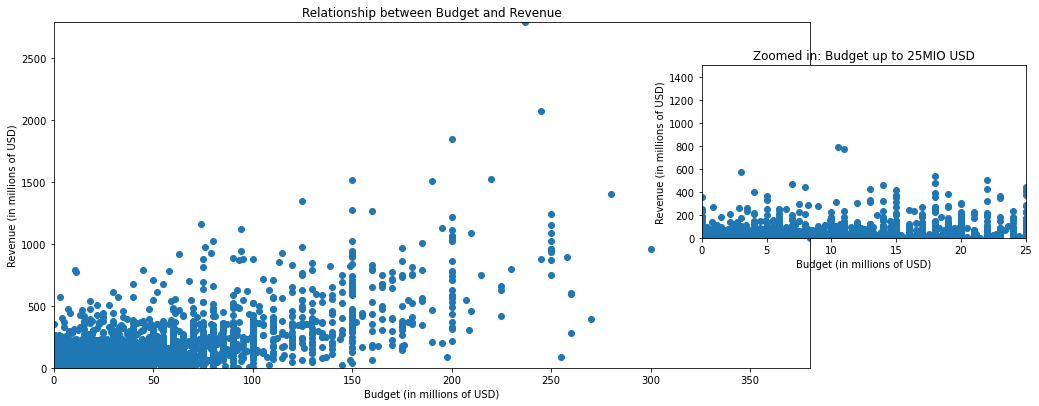

In [9]:
#Visualize the relationship between 2 variables
fig = plt.figure(figsize=(15, 6))
axes1 = fig.add_axes([0.1, 0.1, 0.7, 0.8])
axes2 = fig.add_axes([0.7, 0.4, 0.3, 0.4])

# plot the data on the larger chart
axes1.scatter(df['budget_musd'], df['revenue_musd'])
axes1.set_xlim([0, df['budget_musd'].max()])
axes1.set_ylim([0, df['revenue_musd'].max()])
axes1.set_xlabel('Budget (in millions of USD)')
axes1.set_ylabel('Revenue (in millions of USD)')
axes1.set_title('Relationship between Budget and Revenue')

# plot the zoomed-in data on the smaller chart
axes2.scatter(df['budget_musd'], df['revenue_musd'])
axes2.set_xlim([0, 25])
axes2.set_ylim([0, 1500 ])
axes2.set_xlabel('Budget (in millions of USD)')
axes2.set_ylabel('Revenue (in millions of USD)')
axes2.set_title('Zoomed in: Budget up to 25MIO USD')

plt.show()

In [19]:
#Create a new dataframe with languages decoded 
lang_codes = ['en', 'fr', 'cn', 'ru', 'zh', 'es', 'sv', 'de', 'bn', 'ja', 'ro',
              'it', 'da', 'cs', 'pt', 'fa', 'xx', 'ko', 'hi', 'el', 'pl', 'hu',
              'th', 'tr', 'bm', 'af', 'fi', 'nl', 'vi', 'he', 'no', 'ta', 'sr',
              'nb', 'ca', 'id', 'ar', 'ml', 'ka', 'kn', 'is', 'te', 'mr', 'ur']

# create a list of language names corresponding to the codes
lang_names = ['English', 'French', 'Chinese', 'Russian', 'Chinese', 'Spanish',
              'Swedish', 'German', 'Bengali', 'Japanese', 'Romanian', 'Italian',
              'Danish', 'Czech', 'Portuguese', 'Persian', 'Unknown', 'Korean',
              'Hindi', 'Greek', 'Polish', 'Hungarian', 'Thai', 'Turkish', 'Bambara',
              'Afrikaans', 'Finnish', 'Dutch', 'Vietnamese', 'Hebrew', 'Norwegian',
              'Tamil', 'Serbian', 'Norwegian Bokmål', 'Catalan', 'Indonesian',
              'Arabic', 'Malayalam', 'Georgian', 'Kannada', 'Icelandic', 'Telugu',
              'Marathi', 'Urdu']

# create the DataFrame
languages = pd.DataFrame({'original_language': lang_codes, 'language': lang_names})

# display the DataFrame
languages.head()

,original_language,language
0,en,English
1,fr,French
2,cn,Chinese
3,ru,Russian
4,zh,Chinese


In [20]:
#Merge the original dataframe with a new dataframe 
merged_df = pd.merge(df, languages, on="original_language", how="inner")

In [23]:
#Group by a categorical variable and calculate statistics for each group
summary_stats = merged_df.groupby('language').agg({'budget_musd': ['mean', 'median', 'std'], 'revenue_musd': ['mean', 'median', 'std']})

# print the top 10 languages by mean revenue
sorted_stats = summary_stats.sort_values(('revenue_musd', 'mean'), ascending=False)
sorted_stats.head(10)

budget_musd              revenue_musd              
                mean median   std         mean median    std
language                                                    
English        25.51  10.45 38.93        77.20  20.56 155.84
Chinese        11.76   0.13 20.27        49.51  12.85  73.29
Telugu          8.43   2.92 13.13        43.82  14.00  76.25
Unknown        15.85  15.85  5.44        42.63  42.63  17.86
Japanese        6.32   0.00 11.20        39.92  17.60  62.38
Hindi           5.80   4.37  5.91        22.64  11.81  35.84
Turkish         0.43   0.00  0.73        19.93   0.25  48.86
Korean          4.43   0.00 11.57        19.77   4.82  28.39
Danish          6.65   5.21  8.67        18.20   5.41  40.57
Tamil           4.92   2.20  6.70        18.18  12.00  22.96

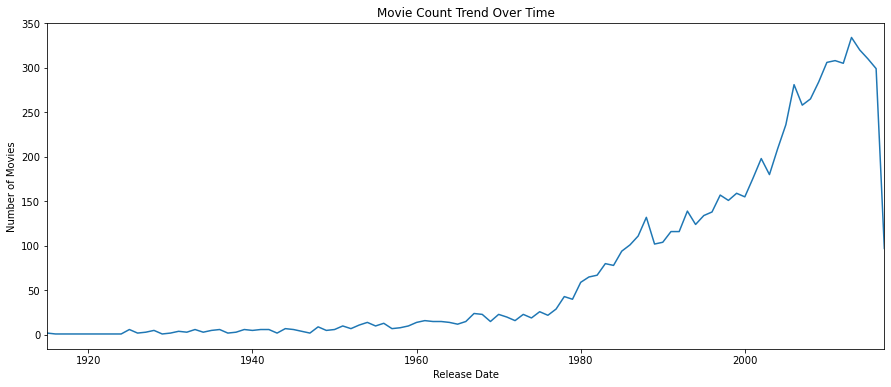

In [12]:
#Show trend over time 
plt.figure(figsize=(15,6))
movie_count = df.groupby(df['release_date'].dt.year)['id'].count()
movie_count.plot(kind='line')
plt.xlabel('Release Date')
plt.ylabel('Number of Movies')
plt.title('Movie Count Trend Over Time')
plt.xlim(left=movie_count.index.min(), right=movie_count.index.max())
plt.show()

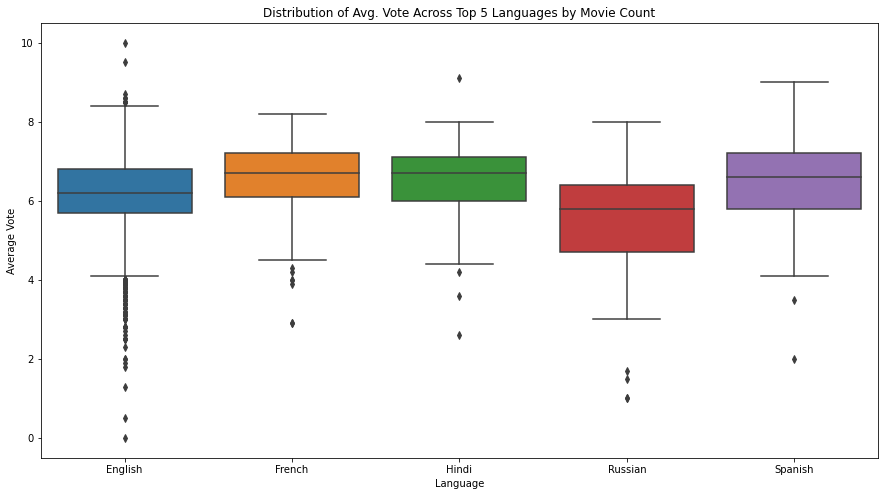

In [46]:
#Create a boxplot visualizing distribution of a variable 
import seaborn as sns
top_langs = merged_df['language'].value_counts().head(5).index.tolist()  # get top 5 languages by movie count
top_langs_df = merged_df[merged_df['language'].isin(top_langs)]  # filter dataframe to include only rows with top 5 languages

# create the box plot
plt.figure(figsize=(15, 8))
sns.boxplot(x='language', y='vote_average', data=top_langs_df, order=top_langs)
plt.xlabel('Language')
plt.ylabel('Average Vote')
plt.title('Distribution of Avg. Vote Across Top 5 Languages by Movie Count')
plt.show()

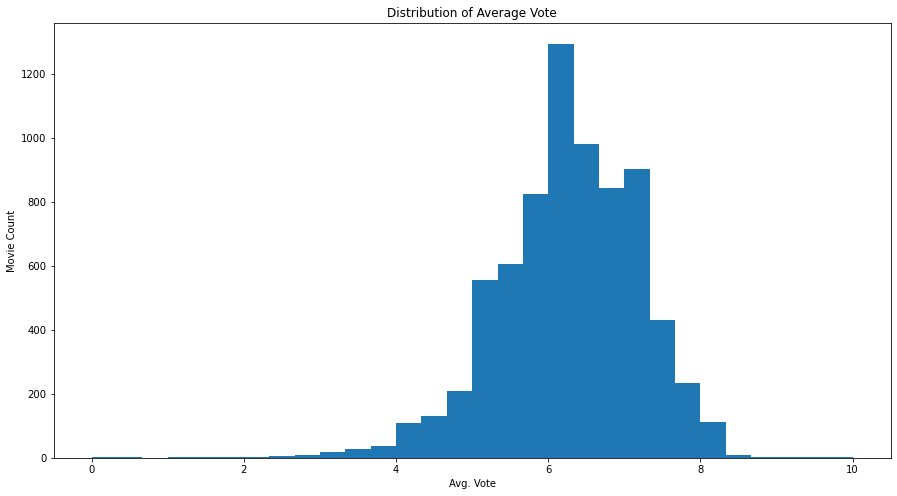

In [43]:
#Create a histogram to visualize the distribution of the vote
vote_data = df['vote_average']
plt.figure(figsize=(15, 8))
plt.hist(vote_data, bins=30)
plt.xlabel('Avg. Vote')
plt.ylabel('Movie Count')
plt.title('Distribution of Average Vote')
plt.show()